Allen Hoskins 

DS7337: Natural Language Processing, Fall 2022

# <center> <u>Homework 5</u>

In [61]:
import numpy as np
import pandas as pd
import nltk
import requests
import json
from bs4 import BeautifulSoup

## 1. Compile a list of static links (permalinks) to individual user movie reviews from one particular website. 

This will be your working dataset for this assignment, as well as for assignments 7 and 8.   

a. It does not matter if you use a crawler or if you manually collect the links, but you will need at least 100 movie review links. Note that, as of this writing, the robots.txt file of IMDB.com allows the crawling of user reviews.

b. Each link should be to a web page that has only one user review of only one movie, e.g., the user review permalinks on the IMDB site.

c.	Choose reviews of movies that are all in the same genre, e.g., sci-fi, mystery, romance, superhero, etc.  

d.	Make sure your collection includes reviews of several movies in your chosen genre and that it includes a mix of negative and positive reviews.  

In [57]:
def get_permalinks(reviews_url):
    
    response = requests.get(reviews_url)
    
    soup = BeautifulSoup(response.content, "html.parser")
    
    a_tags = soup.find_all("a")
    
    permalinks = []
    
    for tag in a_tags:
        if tag.get_text() == "Permalink":
            permalink = "https://www.imdb.com" + tag.attrs['href']
            permalinks.append(permalink)
            
    return permalinks

def get_all_permalinks(pages_dict):
    
    all_permalinks = []
    
    for movie_name, review_page_link in pages_dict.items():
        
        permalinks = get_permalinks(reviews_url=review_page_link)
        all_permalinks += permalinks
        
        title = ' '.join(movie_name.split("_")).title()
        print(f"Scraped {len(permalinks)} Review Permalinks for {title}")
    
    return all_permalinks

In [58]:
review_pages = {'thor:_love_and_thunder':"https://www.imdb.com/title/tt10648342/reviews/?ref_=tt_ql_urv", 
                'dc_league_of_super_pets':"https://www.imdb.com/title/tt8912936/reviews/?ref_=tt_ql_urv", 
                "everything_everywhere_all_at_once":"https://www.imdb.com/title/tt6710474/reviews/?ref_=tt_ql_urv", 
                "the_lost_city":"https://www.imdb.com/title/tt13320622/reviews/?ref_=tt_ql_urv", 
                "deadpool_2":"https://www.imdb.com/title/tt5463162/reviews/?ref_=tt_ql_urv", 
                "deadpool":"https://www.imdb.com/title/tt1431045/reviews/?ref_=tt_ql_urv", 
                "land_of_the_lost":"https://www.imdb.com/title/tt0457400/reviews/?ref_=tt_ql_urv", 
                "free_guy":"https://www.imdb.com/title/tt6264654/reviews/?ref_=tt_ql_urv", 
                "the_suicide_squad":"https://www.imdb.com/title/tt6334354/reviews/?ref_=tt_ql_urv",
                "guardians_of_the_galaxy":"https://www.imdb.com/title/tt2015381/reviews/?ref_=tt_ql_urv"}

plinks = get_all_permalinks(pages_dict=review_pages)

Scraped 25 Review Permalinks for Thor: Love And Thunder
Scraped 25 Review Permalinks for Dc League Of Super Pets
Scraped 25 Review Permalinks for Everything Everywhere All At Once
Scraped 25 Review Permalinks for The Lost City
Scraped 24 Review Permalinks for Deadpool 2
Scraped 25 Review Permalinks for Deadpool
Scraped 25 Review Permalinks for Land Of The Lost
Scraped 25 Review Permalinks for Free Guy
Scraped 25 Review Permalinks for The Suicide Squad
Scraped 24 Review Permalinks for Guardians Of The Galaxy


## 2.	Extract noun phrase (NP) chunks from your reviews using the following procedure:

a. In Python, use BeautifulSoup to grab the main review text from each link.  

b.	Next run each review text through a tokenizer, and then try to NP-chunk it with a shallow parser. 

c.	You probably will have too many unknown words, owing to proper names of characters, actors, and so on that are not in your working dictionary. Make sure the main names that are relevant to the movies in your collection of reviews are added to the working lexicon, and then run the NP chunker again.

In [59]:
def get_review_text_from_url(link):
    
    response = requests.get(link)
    
    soup = BeautifulSoup(response.content, "html.parser")
    
    review_texts = []
    
    for s in soup.find_all('script'):
        if s.has_attr('type'):
            if s.attrs['type'] == "application/ld+json":
                tag_json = json.loads(s.get_text())
                if "reviewBody" in tag_json.keys():
                    body = tag_json['reviewBody']
                    review_texts.append(body)
                    # print(f"link: {link}  length: {len(body)}")
    
    return review_texts

In [62]:
texts = [get_review_text_from_url(link=url) for url in plinks]
reviews_with_text = [txt[0] for txt in texts if len(txt) != 0]

In [179]:
def ie_preprocess(document):
    sentences = nltk.sent_tokenize(document)
    words = [nltk.word_tokenize(sent) for sent in sentences]
    tags = [nltk.pos_tag(word) for word in words]
    return tags

In [272]:
full_tags = []
for i in range(len(reviews_with_text)):
    tags = ie_preprocess(reviews_with_text[i])
    full_tags.append(tags)
    

In [299]:
grammar = r"""
NP: {<NN|NNP|NNS|NNPS>+}
PN: {<Christian><Bale>}"
"""

full_results = []
for i in range(len(full_tags)):
    cp = nltk.RegexpParser(grammar)
    tag = full_tags[i]
    results = []
    for w in range(len(tag)):
        result = cp.parse(tag[w])
        results.append(result)
    full_results.append(results)

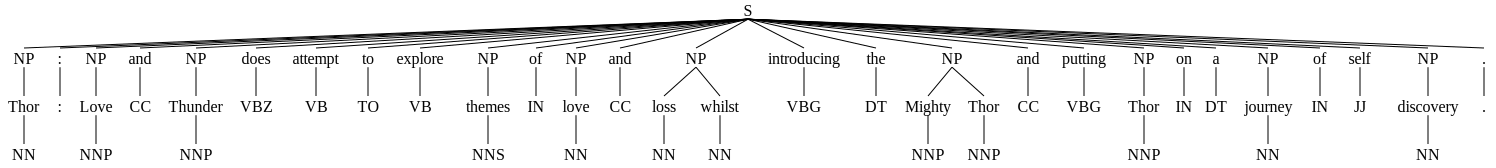

In [310]:
#First Sentence Output
full_results[0][0]

## 3. Output all the chunks in a single list for each review 

submit that output for this assignment. Also submit a brief written summary of what you did (describe your selection of genre, your source of reviews, how many you collected, and by what means).


### INFO:

**Source:**
>       IMDb

**Genre:**
>       Action

**Movies:** <br><br>
>        Thor: Love and Thunder
>        DC League of Super Pets
>        Everything Everywhere All at Once
>        The Lost City
>        Deadpool
>        Deadpool 2
>        Land of the Lost
>        Free Guy
>        The Suicide Squad
>        Guardians of the Galaxy

**TotalReviews:**
>       248


#### **SUMMARY:**

> For Homework 5, I selected 10 different top 50 action movies from IMDb, for each of the movies, I pulled the URL and itterated through the review page to grab the permalink for each review. After collecting 248 permalinks, I utlized `BeautifulSoup` to import the text from each review. Once these were imported and parsed, I was able to utilze several `NLTK` modules (`sent_tokenize`,`word_tokenize`,`pos_tag`) to create a list of tagged sentences that I was able to pass into a chunker (`RegexParser`) to return the needed output. Output was added to a variable called `full_results` and printed below.

In [308]:
full_results

[[Tree('S', [Tree('NP', [('Thor', 'NN')]), (':', ':'), Tree('NP', [('Love', 'NNP')]), ('and', 'CC'), Tree('NP', [('Thunder', 'NNP')]), ('does', 'VBZ'), ('attempt', 'VB'), ('to', 'TO'), ('explore', 'VB'), Tree('NP', [('themes', 'NNS')]), ('of', 'IN'), Tree('NP', [('love', 'NN')]), ('and', 'CC'), Tree('NP', [('loss', 'NN'), ('whilst', 'NN')]), ('introducing', 'VBG'), ('the', 'DT'), Tree('NP', [('Mighty', 'NNP'), ('Thor', 'NNP')]), ('and', 'CC'), ('putting', 'VBG'), Tree('NP', [('Thor', 'NNP')]), ('on', 'IN'), ('a', 'DT'), Tree('NP', [('journey', 'NN')]), ('of', 'IN'), ('self', 'JJ'), Tree('NP', [('discovery', 'NN')]), ('.', '.')]),
  Tree('S', [('However', 'RB'), (',', ','), ('it', 'PRP'), ('sadly', 'RB'), ('does', 'VBZ'), ("n't", 'RB'), ('work', 'VB'), ('as', 'RB'), ('well', 'RB'), ('as', 'IN'), ('it', 'PRP'), ('should', 'MD'), ('due', 'VB'), ('to', 'TO'), ('a', 'DT'), ('rushed', 'JJ'), Tree('NP', [('pace', 'NN')]), ('and', 'CC'), Tree('NP', [('way', 'NN')]), ('too', 'RB'), ('many', 'JJ